### word2vec-Edin Logistic Regression

In [28]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('w2v.twitter.edinburgh10M.400d.txt.word2vec')

In [31]:
print(model.most_similar(positive="obama"))
print(len(model['obama']))

[('obamas', 0.7016106843948364), ('bho', 0.6924901008605957), ('#obama', 0.677671492099762), ('obamaâ\x80\x99s', 0.672095775604248), ('potus', 0.6554491519927979), ('karzai', 0.6271429657936096), ('zardari', 0.5904218554496765), ('medvedev', 0.5850324034690857), ('palin', 0.5791465044021606), ('netanyahu', 0.5740561485290527)]
400


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score

#### Read Cleaned Data

In [35]:
oba_cleanall = np.load('./TrainData/tweets_oba.npy', allow_pickle=True)
targets_oba = np.load('./TrainData/targets_oba.npy', allow_pickle=True)
rom_cleanall = np.load('./TrainData/tweets_rom.npy', allow_pickle=True)
targets_rom = np.load('./TrainData/targets_rom.npy', allow_pickle=True)
df_oba = pd.DataFrame({'tweet':oba_cleanall, 'label': targets_oba })
df_rom = pd.DataFrame({'tweet':rom_cleanall, 'label': targets_rom })

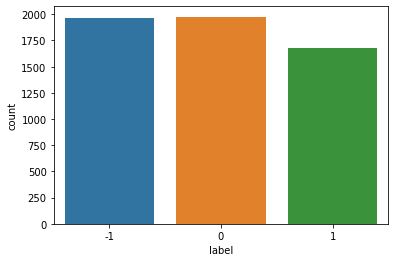

In [36]:
sns.countplot(df_oba['label'])

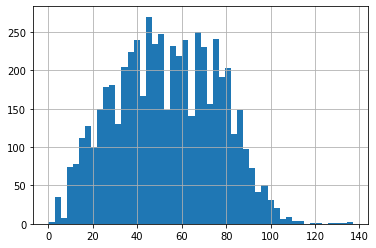

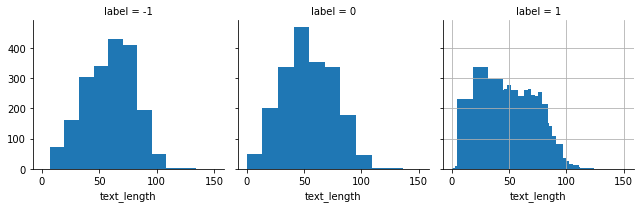

In [39]:
df_oba['text_length'] = df_oba['tweet'].apply(len)
df_oba[['label','text_length','tweet']].head()
df_oba['text_length'].describe()
df_oba['text_length'].hist(bins=50)
g = sns.FacetGrid(df_oba,col='label')
g.map(plt.hist,'text_length')

df_rom['text_length'] = df_rom['tweet'].apply(len)
df_rom[['label','text_length','tweet']].head()
df_rom['text_length'].describe()
df_rom['text_length'].hist(bins=50)
# g = sns.FacetGrid(df_rom,col='label')
# g.map(plt.hist,'text_length')

In [32]:
#Preparing Vectors for Tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [40]:
# Preparing word2vec feature set…
tokenized_tweet = df_oba['tweet'].apply(lambda x: x.split())

wordvec_arrays = np.zeros((len(tokenized_tweet), 400))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 400)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(5624, 400)

In [48]:
train_w2v, test_w2v, train_Y, test_Y = train_test_split(wordvec_df, df_oba['label'], test_size = 0.2, random_state = 42)
# train_w2v = wordvec_df.iloc[:3655,:]
# test_w2v = wordvec_df.iloc[3655:,:]

# xtrain_w2v = train_w2v.iloc[train_Y.index,:]
# xvalid_w2v = train_w2v.iloc[test_Y.index,:]

In [54]:
logisticReg = LogisticRegression(solver='lbfgs')
logisticReg.fit(train_w2v, train_Y)
Y_lr_predict=logisticReg.predict(test_w2v)

print("Logistic Regression - Training Result")
print(classification_report(logisticReg.predict(train_w2v),train_Y,digits=4))
print("Logistic Regression - Validation Result")
print(classification_report(Y_lr_predict,test_Y, digits=4))

# prediction = logisticReg.predict_proba(test_w2v)
#
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int)
#
# f1_score(test_Y, prediction_int)

Logistic Regression - Training Result
              precision    recall  f1-score   support

          -1     0.6797    0.5686    0.6192      1889
           0     0.5464    0.5697    0.5578      1520
           1     0.5360    0.6560    0.5899      1090

    accuracy                         0.5901      4499
   macro avg     0.5874    0.5981    0.5890      4499
weighted avg     0.5999    0.5901    0.5914      4499

Logistic Regression - Validation Result
              precision    recall  f1-score   support

          -1     0.6959    0.5336    0.6040       506
           0     0.5153    0.5706    0.5416       354
           1     0.4783    0.6226    0.5410       265

    accuracy                         0.5662      1125
   macro avg     0.5631    0.5756    0.5622      1125
weighted avg     0.5878    0.5662    0.5695      1125

